In [1]:
import pandas as pd
import numpy as np

In [3]:
category_cluster = pd.read_csv("../data/category_cluster.csv")
product_cluster = pd.read_csv("../data/product_cluster.csv")

In [4]:
data1 = pd.read_csv("../data/data1.csv")

In [6]:
data_purchase = data1[data1["event_type"] == "purchase"]

In [8]:
data_purchase_category = data_purchase.groupby(["category_id"]).agg({"price": "sum"})

In [10]:
data_purchase_product = data_purchase.groupby(["product_id"]).agg({"price": "sum"})

In [13]:
category_cluster = pd.merge(category_cluster, data_purchase_category, how = "inner", on = "category_id")

In [14]:
product_cluster = pd.merge(product_cluster, data_purchase_product, how = "inner", on = "product_id")

In [16]:
del category_cluster["Unnamed: 0"]
del product_cluster["Unnamed: 0"]

In [121]:
data1

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,days,date
0,0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,2019-10-01
1,1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,2019-10-01
2,2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,0,2019-10-01
3,3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,0,2019-10-01
4,4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,0,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
20688237,20688237,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,151,2020-02-29
20688238,20688238,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,151,2020-02-29
20688239,20688239,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,151,2020-02-29
20688240,20688240,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,151,2020-02-29


In [17]:
category_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id,price
0,0.118280,0.363636,0.043011,0.032258,Not Popular Category,1487580004807082827,46.80
1,0.637740,0.151953,0.096906,0.523661,Protential Popular Category,1487580004832248652,30980.76
2,0.742375,0.163656,0.121494,0.737182,Protential Popular Category,1487580004857414477,22050.11
3,0.726172,0.188601,0.136957,0.578760,Protential Popular Category,1487580004882580302,8285.57
4,0.832778,0.202300,0.168471,0.733136,Protential Popular Category,1487580004916134735,80341.84
...,...,...,...,...,...,...,...
463,0.036111,0.230769,0.008333,0.024306,Not Popular Category,2222113024708182273,2415.88
464,0.373770,0.184211,0.068852,0.236066,Not Popular Category,2235524494015856752,531.65
465,0.092842,0.167939,0.015592,0.059532,Not Popular Category,2235524499216793855,2012.05
466,0.216938,0.228228,0.049511,0.084691,Not Popular Category,2235524499636224267,863.39


In [18]:
category_cluster.groupby(["labels"]).agg({"price":"sum"})

,price
labels,
Not Popular Category,2136099.72
Popular Category,856892.03
Protential Popular Category,3362663.96


In [19]:
product_cluster.groupby(["labels"]).agg({"price":"sum"})

,price
labels,
Not Popular Category,856573.23
Popular Category(Cart),49112.76
Popular Category(View),4748520.12
Protential Popular Category,910091.75


In [36]:
data_purchase.nunique()

Unnamed: 0       1287007
event_time        157920
event_type             1
product_id         40777
category_id          468
category_code         11
brand                250
price               2253
user_id           110518
user_session      155617
days                 152
date                 152
dtype: int64

In [63]:
data_brand_product_price = data_purchase.groupby(["brand", "product_id"]).agg({"price":"sum"})
data_brand_product_price.reset_index(inplace=True)

In [64]:
data_brand_product_price

,brand,product_id,price
0,airnails,5659639,33.20
1,airnails,5659641,0.95
2,airnails,5659644,7.55
3,airnails,5659645,7.60
4,airnails,5659646,11.40
...,...,...,...
23110,zinger,5882432,11.00
23111,zinger,5882433,15.25
23112,zinger,5882434,14.52
23113,zinger,5901817,1.90


In [69]:
data_brand_product_price = data_brand_product_price.groupby(["brand"]).agg({"product_id":"count"})

In [65]:
data_brand_product = data_purchase.groupby(["brand"]).agg({"price":"sum", "user_session": "count"}).sort_values(by = "price", ascending = False)

In [71]:
data_brand_product.reset_index(inplace=True)

In [74]:
data_brand_product_price.reset_index(inplace=True)

In [75]:
data_brand_product_price

,brand,product_id
0,airnails,197
1,almea,28
2,andrea,2
3,ardell,50
4,arganoil,4
...,...,...
245,yoko,155
246,ypsed,28
247,yu-r,6
248,zeitun,135


In [72]:
data_brand_product

,brand,price,user_session
0,runail,343433.19,111408
1,grattol,266295.94,49542
2,irisk,223903.38,73806
3,uno,190719.46,17586
4,strong,151941.80,850
...,...,...,...
245,ovale,16.12,5
246,pilaten,8.09,3
247,rocknailstar,6.66,5
248,helloganic,3.10,1


In [76]:
data_brand_product = pd.merge(data_brand_product, data_brand_product_price, how = "inner", on = "brand")

In [77]:
data_brand_product

,brand,price,user_session,product_id
0,runail,343433.19,111408,1277
1,grattol,266295.94,49542,319
2,irisk,223903.38,73806,1263
3,uno,190719.46,17586,247
4,strong,151941.80,850,16
...,...,...,...,...
245,ovale,16.12,5,3
246,pilaten,8.09,3,2
247,rocknailstar,6.66,5,1
248,helloganic,3.10,1,1


In [118]:
data_brand_product["price"].sum()

3787823.690000056

In [119]:
(343433.19+266295.94+223903.38)/3787823.690000056

0.2200821839202309

In [83]:
data_brand_product["product per session"] = data_brand_product["user_session"] / data_brand_product["product_id"]

In [87]:
data_brand_product

,brand,price,user_session,product_id,product per session
0,runail,343433.19,111408,1277,87.241973
1,grattol,266295.94,49542,319,155.304075
2,irisk,223903.38,73806,1263,58.437055
3,uno,190719.46,17586,247,71.198381
4,strong,151941.80,850,16,53.125000
...,...,...,...,...,...
245,ovale,16.12,5,3,1.666667
246,pilaten,8.09,3,2,1.500000
247,rocknailstar,6.66,5,1,5.000000
248,helloganic,3.10,1,1,1.000000


In [91]:
data_brand_product[(data_brand_product["price"] < 50000) & (data_brand_product["product per session"] >= 100)]

,brand,price,user_session,product_id,product per session
24,bpw.style,44636.28,37943,304,124.812500
34,severina,26272.81,9173,54,169.870370
49,artex,15946.37,1694,16,105.875000
53,refectocil,13217.43,1791,14,127.928571
58,levissime,10975.61,2234,6,372.333333
157,balbcare,1090.47,346,2,173.000000
158,soleo,1028.93,1235,11,112.272727


In [120]:
(10975.61+1090.47+1028.93)/3787823.690000056

0.0034571329269023625

In [101]:
data_brand_product[(data_brand_product["price"] > 100) & (data_brand_product["product per session"] < 2)]

,brand,price,user_session,product_id,product per session
105,gezatone,2665.39,65,40,1.625000
106,babyliss,2626.40,43,27,1.592593
156,avene,1109.59,59,42,1.404762
160,beautific,969.84,50,33,1.515152
184,beautyblender,526.60,21,11,1.909091
185,litaline,497.69,33,26,1.269231
192,note,456.81,50,41,1.219512
193,vichy,417.68,26,22,1.181818
197,egomania,387.07,30,19,1.578947
202,fedua,345.40,13,7,1.857143


In [105]:
data_brand_product[(data_brand_product["user_session"] < 10) & (data_brand_product["product per session"] < 3)]

,brand,price,user_session,product_id,product per session
211,dorena,274.85,5,4,1.250000
215,kondor,229.06,4,2,2.000000
216,termix,219.04,9,7,1.285714
221,sun,148.28,2,1,2.000000
223,radius,110.30,5,4,1.250000
224,resize,107.32,8,4,2.000000
226,kares,100.75,5,3,1.666667
229,dobrovit,86.83,8,7,1.142857
232,arganoil,73.21,5,4,1.250000
233,juno,64.70,9,4,2.250000


In [78]:
import matplotlib.pyplot as plt

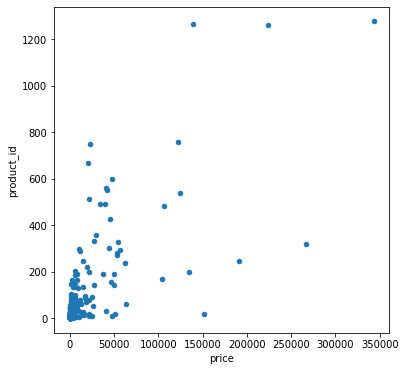

In [79]:
data_brand_product.plot.scatter(x='price', y='product_id')
fig_a = plt.gcf()
fig_a.set_size_inches(6, 6)
plt.show()

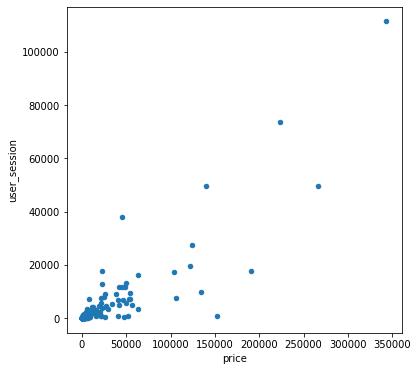

In [80]:
data_brand_product.plot.scatter(x='price', y='user_session')
fig_a = plt.gcf()
fig_a.set_size_inches(6, 6)
plt.show()

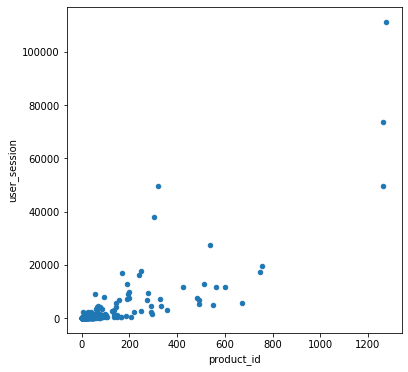

In [81]:
data_brand_product.plot.scatter(x='product_id', y='user_session')
fig_a = plt.gcf()
fig_a.set_size_inches(6, 6)
plt.show()